## Домашняя работа №4
Мортина Анастасия 3821Б1ФИ3

**Постановка задачи**:

С данными датасета, выбранного для домашнего задания №1, решить задачу кластеризации 3 методами: KMeans, DBSCAN и любым другим на выбор. Сделать выводы.

In [14]:
#Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import optuna

In [11]:
#Загрузка данных
data = pd.read_csv("C:\\Users\\Анастасия\\.ipynb_checkpoints\\Hotel Reservations.csv")

#Удаление целевой метки
data = data.drop(labels="Booking_ID", axis=1)

#Преобразование категориальных признаков
categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

#Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['booking_status']))

#Оверсэмплинг
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(data_scaled, data['booking_status'])

#Разделение данных на обучающую и тестовую выборки
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42)

### Кластеризация

**1) Метод KMeans:**

[I 2024-12-20 20:24:51,590] A new study created in memory with name: no-name-165f90c7-c4c4-494e-adef-3a293e435c02
[I 2024-12-20 20:24:51,791] Trial 0 finished with value: 0.056171975652466684 and parameters: {'n_clusters': 5}. Best is trial 0 with value: 0.056171975652466684.
[I 2024-12-20 20:24:52,022] Trial 1 finished with value: 0.036906345551508776 and parameters: {'n_clusters': 7}. Best is trial 0 with value: 0.056171975652466684.
[I 2024-12-20 20:24:52,242] Trial 2 finished with value: 0.030403897865442984 and parameters: {'n_clusters': 10}. Best is trial 0 with value: 0.056171975652466684.
[I 2024-12-20 20:24:52,404] Trial 3 finished with value: 0.03610852130429197 and parameters: {'n_clusters': 8}. Best is trial 0 with value: 0.056171975652466684.
[I 2024-12-20 20:24:52,538] Trial 4 finished with value: 0.019660294744642957 and parameters: {'n_clusters': 4}. Best is trial 0 with value: 0.056171975652466684.
[I 2024-12-20 20:24:52,835] Trial 5 finished with value: 0.036108521304

Результаты KMeans:
ARI: 0.04751499986067927
Silhouette Score: 0.1373054487285077


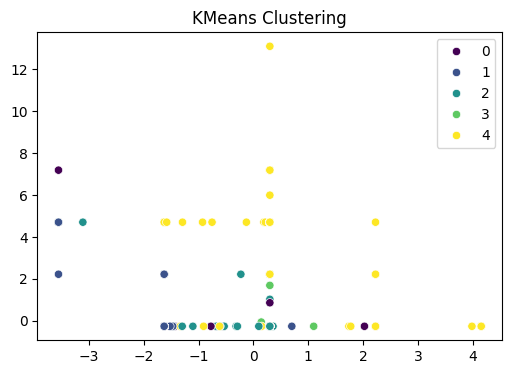

In [12]:
#Кластеризация
def objective_kmeans(trial):
    n_clusters = trial.suggest_int('n_clusters', 1, 10)
    clustering = KMeans(n_clusters=n_clusters, random_state=42).fit(X_res_train)
    return adjusted_rand_score(y_res_train, clustering.labels_)

study_kmeans = optuna.create_study(direction="maximize")
study_kmeans.optimize(objective_kmeans, n_trials=20)
best_params_kmeans = study_kmeans.best_params

clustering_kmeans = KMeans(n_clusters=best_params_kmeans['n_clusters'], random_state=42).fit(X_res_test)
ari_kmeans = adjusted_rand_score(y_res_test, clustering_kmeans.labels_)
kmeans_silhouette = silhouette_score(X_res_test, clustering_kmeans.labels_)

print("Результаты KMeans:")
print(f"ARI: {ari_kmeans}")
print(f"Silhouette Score: {kmeans_silhouette}")

#Визуализация результатов
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_res_test[:, 0], y=X_res_test[:, 1], hue=clustering_kmeans.labels_, palette='viridis')
plt.title('KMeans Clustering')
plt.show()

**2) Метод DBSCAN:**

[I 2024-12-20 20:26:34,528] A new study created in memory with name: no-name-dfc06dfa-4515-4134-804b-33688b9501af
[I 2024-12-20 20:26:36,217] Trial 0 finished with value: 0.022501557654137347 and parameters: {'eps': 1.5166911285906766, 'min_samples': 84}. Best is trial 0 with value: 0.022501557654137347.
[I 2024-12-20 20:35:54,600] Trial 1 finished with value: 0.0024490869766461225 and parameters: {'eps': 4.637138273053256, 'min_samples': 108}. Best is trial 0 with value: 0.022501557654137347.
[I 2024-12-20 20:36:15,610] Trial 2 finished with value: 0.0033190280966870936 and parameters: {'eps': 2.95268716606839, 'min_samples': 171}. Best is trial 0 with value: 0.022501557654137347.
[I 2024-12-20 20:36:19,648] Trial 3 finished with value: 0.023754278918613262 and parameters: {'eps': 2.527441376282052, 'min_samples': 115}. Best is trial 3 with value: 0.023754278918613262.
[I 2024-12-20 20:36:21,435] Trial 4 finished with value: 0.007818640514048177 and parameters: {'eps': 1.2823433599705

Результаты DBSCAN:
ARI: 0.02973842729588224
Silhouette Score: 0.12459739261564522


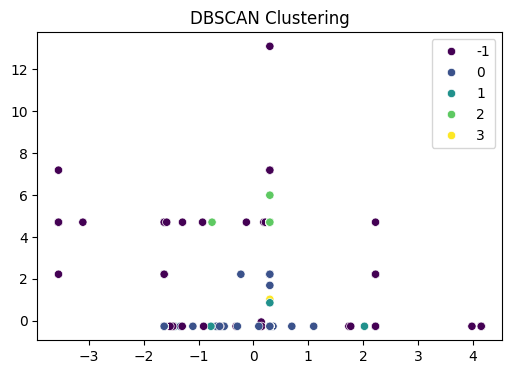

In [13]:
#Кластеризация
def objective_dbscan(trial):
    eps = trial.suggest_float('eps', 1.0, 5.0)
    min_samples = trial.suggest_int('min_samples', 10, 200)
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X_res_train)
    return adjusted_rand_score(y_res_train, clustering.labels_)

study_dbscan = optuna.create_study(direction="maximize")
study_dbscan.optimize(objective_dbscan, n_trials=20)
best_params_dbscan = study_dbscan.best_params

clustering_dbscan = DBSCAN(**best_params_dbscan).fit(X_res_test)
ari_dbscan = adjusted_rand_score(y_res_test, clustering_dbscan.labels_)
dbscan_silhouette = silhouette_score(X_res_test, clustering_dbscan.labels_)

print("Результаты DBSCAN:")
print(f"ARI: {ari_dbscan}")
print(f"Silhouette Score: {dbscan_silhouette}")

#Визуализация результатов 
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_res_test[:, 0], y=X_res_test[:, 1], hue=clustering_dbscan.labels_, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

**3) Метод Agglomerative Clustering:**

[I 2024-12-20 20:50:36,238] A new study created in memory with name: no-name-58547e16-725b-461e-bb79-c6aa860ba082
[I 2024-12-20 20:52:18,609] Trial 0 finished with value: 0.001288468253549149 and parameters: {'n_clusters': 2}. Best is trial 0 with value: 0.001288468253549149.
[I 2024-12-20 20:53:56,967] Trial 1 finished with value: 0.020250082768910955 and parameters: {'n_clusters': 10}. Best is trial 1 with value: 0.020250082768910955.
[I 2024-12-20 20:55:31,871] Trial 2 finished with value: 0.012382108660768094 and parameters: {'n_clusters': 8}. Best is trial 1 with value: 0.020250082768910955.
[I 2024-12-20 20:57:02,508] Trial 3 finished with value: 0.0 and parameters: {'n_clusters': 1}. Best is trial 1 with value: 0.020250082768910955.
[I 2024-12-20 20:58:38,034] Trial 4 finished with value: 0.011405711683009866 and parameters: {'n_clusters': 7}. Best is trial 1 with value: 0.020250082768910955.
[I 2024-12-20 21:00:14,559] Trial 5 finished with value: 0.01148064388548527 and parame

Результаты Agglomerative Clustering:
ARI: 0.028048774562407702
Silhouette Score: 0.14590495523549168


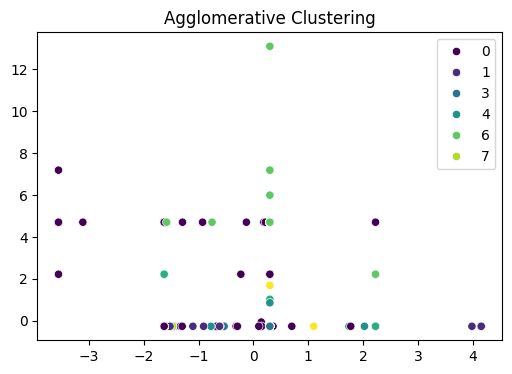

In [15]:
#Кластеризация
def objective_agglomerative(trial):
    n_clusters = trial.suggest_int('n_clusters', 1, 10)
    clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(X_res_train)
    return adjusted_rand_score(y_res_train, clustering.labels_)

study_agglomerative = optuna.create_study(direction="maximize")
study_agglomerative.optimize(objective_agglomerative, n_trials=20)
best_params_agglomerative = study_agglomerative.best_params

clustering_agglomerative = AgglomerativeClustering(n_clusters=best_params_agglomerative['n_clusters']).fit(X_res_test)
ari_agglomerative = adjusted_rand_score(y_res_test, clustering_agglomerative.labels_)
agglomerative_silhouette = silhouette_score(X_res_test, clustering_agglomerative.labels_)

print("Результаты Agglomerative Clustering:")
print(f"ARI: {ari_agglomerative}")
print(f"Silhouette Score: {agglomerative_silhouette}")

#Визуализация результатов 
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_res_test[:, 0], y=X_res_test[:, 1], hue=clustering_agglomerative.labels_, palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

**Итоговые выводы:**

In [17]:
#Сравнение результатов
table1 = [["KMeans", ari_kmeans, kmeans_silhouette],
          ["DBSCAN", ari_dbscan, dbscan_silhouette],
          ["Agglomerative", ari_agglomerative, agglomerative_silhouette]]
comparison_df = pd.DataFrame(table1, columns=["Метод", "ARI", "Silhouette Score"])
print(comparison_df)

#Выводы
print("Выводы:")
print(f"KMeans: ARI = {ari_kmeans}, Silhouette = {kmeans_silhouette}")
print(f"DBSCAN: ARI = {ari_dbscan}, Silhouette = {dbscan_silhouette}")
print(f"Agglomerative: ARI = {ari_agglomerative}, Silhouette = {agglomerative_silhouette}")

           Метод       ARI  Silhouette Score
0         KMeans  0.047515          0.137305
1         DBSCAN  0.029738          0.124597
2  Agglomerative  0.028049          0.145905
Выводы:
KMeans: ARI = 0.04751499986067927, Silhouette = 0.1373054487285077
DBSCAN: ARI = 0.02973842729588224, Silhouette = 0.12459739261564522
Agglomerative: ARI = 0.028048774562407702, Silhouette = 0.14590495523549168


- Все три метода кластеризации показали низкие значения, что указывает на то, что кластеризация не очень хорошо соответствует истинным меткам и не очень хорошо разделяет данные на кластеры.
- Метод KMeans показал лучшие результаты по ARI, что указывает на то, что он лучше соответствует истинным меткам по сравнению с другими методами.
- Метод Agglomerative Clustering показал лучшие результаты по Silhouette Score, что указывает на то, что он лучше сгруппировал объекты в своих кластерах по сравнению с другими методами.

На основе полученных результатов можно сделать вывод, что все три метода кластеризации показали низкие значения ARI и Silhouette Score, что указывает на необходимость дальнейшего анализа и улучшения методов кластеризации. 